#  Introductory Statistics

In [1]:
suppressMessages(library(tidyr))
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))
suppressMessages(library("corrplot"))

## Descriptive statistics

When you first encounter a data set, it is essential to learn about it via summary statistics and **visualization**.

### Why visualization is essential

In [2]:
summary(anscombe)

       x1             x2             x3             x4           y1        
 Min.   : 4.0   Min.   : 4.0   Min.   : 4.0   Min.   : 8   Min.   : 4.260  
 1st Qu.: 6.5   1st Qu.: 6.5   1st Qu.: 6.5   1st Qu.: 8   1st Qu.: 6.315  
 Median : 9.0   Median : 9.0   Median : 9.0   Median : 8   Median : 7.580  
 Mean   : 9.0   Mean   : 9.0   Mean   : 9.0   Mean   : 9   Mean   : 7.501  
 3rd Qu.:11.5   3rd Qu.:11.5   3rd Qu.:11.5   3rd Qu.: 8   3rd Qu.: 8.570  
 Max.   :14.0   Max.   :14.0   Max.   :14.0   Max.   :19   Max.   :10.840  
       y2              y3              y4        
 Min.   :3.100   Min.   : 5.39   Min.   : 5.250  
 1st Qu.:6.695   1st Qu.: 6.25   1st Qu.: 6.170  
 Median :8.140   Median : 7.11   Median : 7.040  
 Mean   :7.501   Mean   : 7.50   Mean   : 7.501  
 3rd Qu.:8.950   3rd Qu.: 7.98   3rd Qu.: 8.190  
 Max.   :9.260   Max.   :12.74   Max.   :12.500  

#### Linear regression is similar for 4 data sets

In [3]:
for (i in 1:4) {
    print(paste("Data Set", i))
    print(lm(anscombe[,i+4] ~ anscombe[,i]))
}

[1] "Data Set 1"

Call:
lm(formula = anscombe[, i + 4] ~ anscombe[, i])

Coefficients:
  (Intercept)  anscombe[, i]  
       3.0001         0.5001  

[1] "Data Set 2"

Call:
lm(formula = anscombe[, i + 4] ~ anscombe[, i])

Coefficients:
  (Intercept)  anscombe[, i]  
        3.001          0.500  

[1] "Data Set 3"

Call:
lm(formula = anscombe[, i + 4] ~ anscombe[, i])

Coefficients:
  (Intercept)  anscombe[, i]  
       3.0025         0.4997  

[1] "Data Set 4"

Call:
lm(formula = anscombe[, i + 4] ~ anscombe[, i])

Coefficients:
  (Intercept)  anscombe[, i]  
       3.0017         0.4999  



#### Visualization shows how misleading linear fits can be

In [4]:
# total number of data points
n <- prod(dim(anscombe))

In [5]:
# use of tidyr to format data for ggplot
df <- anscombe %>% gather %>% 
  separate(key, into=c("xy", "expt"), sep=1) %>% 
  mutate(row = rep(1:(n%/%2), 2)) %>% 
  spread(xy, value) %>% 
  select(-row)

In [6]:
options(repr.plot.width=6, repr.plot.height=4)

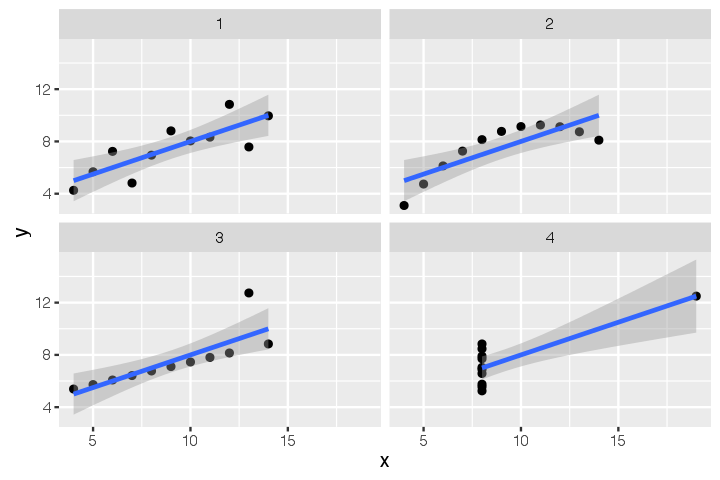

In [7]:
ggplot(df, aes(x=x, y=y)) + 
  geom_point() + 
  geom_smooth(method=lm) + 
  facet_wrap(~ expt, nrow = 2)

### Less fancy way to achieve same result

The use of `tidyr` so that the 4 plots can be shown with a single command is quite tricky. If there are only a few plots, you can achieve the same result by brute force.

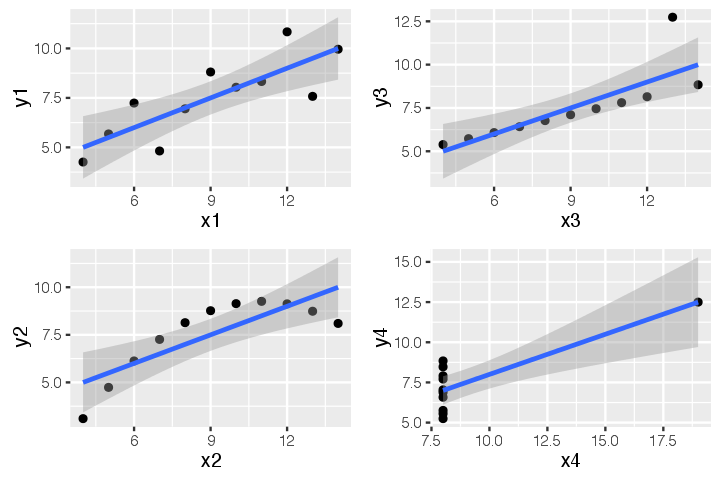

In [8]:
g1 <- ggplot(anscombe, aes(x=x1, y=y1)) + geom_point() + geom_smooth(method=lm)
g2 <- ggplot(anscombe, aes(x=x2, y=y2)) + geom_point() + geom_smooth(method=lm)
g3 <- ggplot(anscombe, aes(x=x3, y=y3)) + geom_point() + geom_smooth(method=lm)
g4 <- ggplot(anscombe, aes(x=x4, y=y4)) + geom_point() + geom_smooth(method=lm)

Rmisc::multiplot(g1, g2, g3, g4, cols=2)

### Generating summary statistics

In [9]:
head(iris)

Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1          5.1         3.5          1.4         0.2  setosa
2          4.9         3.0          1.4         0.2  setosa
3          4.7         3.2          1.3         0.2  setosa
4          4.6         3.1          1.5         0.2  setosa
5          5.0         3.6          1.4         0.2  setosa
6          5.4         3.9          1.7         0.4  setosa

In [10]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

### Summary by species with `dplyr`

In [11]:
iris %>% group_by(Species) %>% summarise(
    mean.sl = mean(Sepal.Length), 
    mean.sw = mean(Sepal.Width),
    mean.pl = mean(Petal.Length),
    mean.pw = mean(Petal.Width))

Species mean.sl mean.sw mean.pl mean.pw
1     setosa   5.006   3.428   1.462   0.246
2 versicolor   5.936   2.770   4.260   1.326
3  virginica   6.588   2.974   5.552   2.026

### Work

**1**. Construct a data frame with the mean and sd of the `wt` and `mpg` of  automatic (am=0) and manual (am=1) cars in  `mtcars` using `dplyr`.

In [12]:
head(mtcars)

mpg cyl disp  hp drat    wt  qsec vs am gear carb
Mazda RX4         21.0   6  160 110 3.90 2.620 16.46  0  1    4    4
Mazda RX4 Wag     21.0   6  160 110 3.90 2.875 17.02  0  1    4    4
Datsun 710        22.8   4  108  93 3.85 2.320 18.61  1  1    4    1
Hornet 4 Drive    21.4   6  258 110 3.08 3.215 19.44  1  0    3    1
Hornet Sportabout 18.7   8  360 175 3.15 3.440 17.02  0  0    3    2
Valiant           18.1   6  225 105 2.76 3.460 20.22  1  0    3    1

In [46]:
mtcars$transmission = factor(mtcars$am, levels=c(0,1), labels=c("Automatic", "Manual"))

mtcars %>% select(c(wt, mpg)) %>% 
  group_by(am = mtcars$transmission) %>% 
  summarise(
    mean.wt = mean(wt),
    sd.wt = sd(wt),
    mean.mpg = mean(mpg),
    sd.mpg = sd(mpg)
)

am  mean.wt     sd.wt mean.mpg   sd.mpg
1 Automatic 3.768895 0.7774001 17.14737 3.833966
2    Manual 2.411000 0.6169816 24.39231 6.166504

**2**. Plot linear regression fits using `ggplot` and `lm` for `mpg` against `wt`, using separate plots for automatic and manual cars.

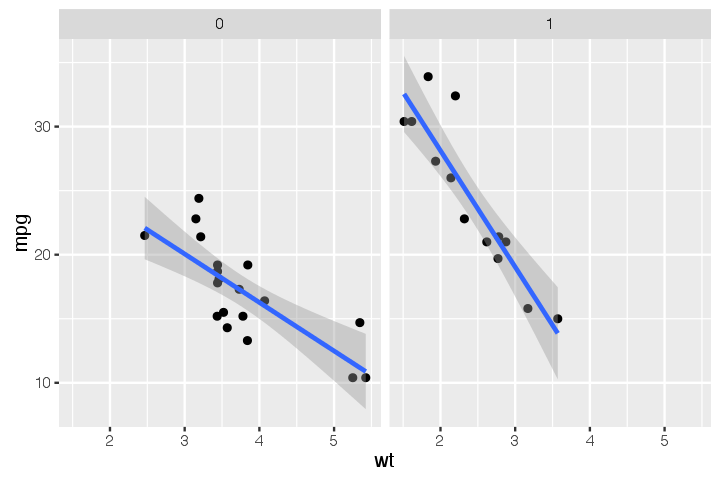

In [14]:
ggplot(mtcars, aes(x=wt, y=mpg)) + geom_point() + geom_smooth(method=lm) + facet_wrap(~ am, nrow = 1)

### Correlations

#### Global

In [15]:
round(cor(iris[,1:4]), 2)

Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length         1.00       -0.12         0.87        0.82
Sepal.Width         -0.12        1.00        -0.43       -0.37
Petal.Length         0.87       -0.43         1.00        0.96
Petal.Width          0.82       -0.37         0.96        1.00

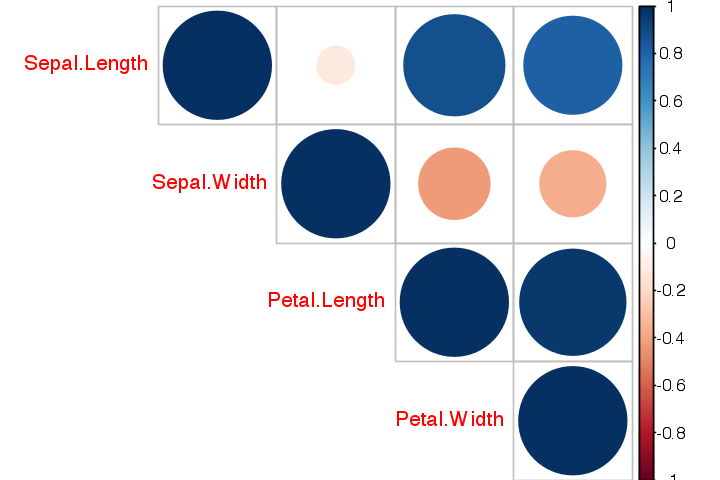

In [16]:
corrplot(cor(iris[, 1:4]), method="circle", type="upper")

#### For each species

In [17]:
iris %>% group_by(Species) %>% summarize(
    r.sl.sw = cor(Sepal.Length, Sepal.Width),
    r.sl.pl = cor(Sepal.Length, Petal.Length),
    r.sl.pw = cor(Sepal.Length, Petal.Width),
    r.sw.sl = cor(Sepal.Width, Sepal.Length),
    r.sw.pw = cor(Sepal.Width, Petal.Width),
    r.pl.pw = cor(Petal.Length, Petal.Width)
)

Species   r.sl.sw   r.sl.pl   r.sl.pw   r.sw.sl   r.sw.pw   r.pl.pw
1     setosa 0.7425467 0.2671758 0.2780984 0.7425467 0.2327520 0.3316300
2 versicolor 0.5259107 0.7540490 0.5464611 0.5259107 0.6639987 0.7866681
3  virginica 0.4572278 0.8642247 0.2811077 0.4572278 0.5377280 0.3221082

#### We visually confirm the surprisingly low correlation between sepal length and petal length in *setosa*

In [18]:
options(repr.plot.width=6, repr.plot.height=2)

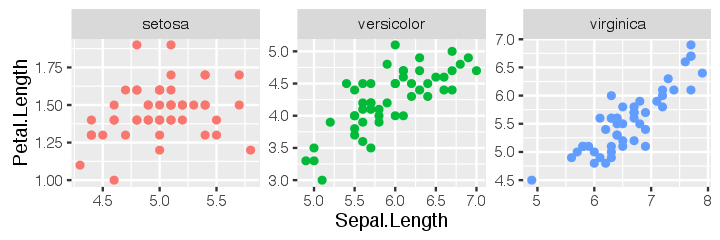

In [19]:
ggplot(iris, aes(x=Sepal.Length, y=Petal.Length, color=Species)) +
  geom_point() + 
  facet_wrap(~ Species, scale="free") +
  guides(color=FALSE)

### Frequency tables

In [47]:
mtcars %>% count(transmission)

transmission  n
1    Automatic 19
2       Manual 13

In [48]:
mtcars %>% count(transmission) %>% mutate(prop = round(prop.table(n), 4))

transmission  n   prop
1    Automatic 19 0.5938
2       Manual 13 0.4062

In [49]:
mtcars %>% count(transmission, gear)

transmission gear  n
1    Automatic    3 15
2    Automatic    4  4
3       Manual    4  8
4       Manual    5  5

In [50]:
mtcars %>% count(transmission, gear) %>% spread(key=gear, value=n)

transmission  3 4  5
1    Automatic 15 4 NA
2       Manual NA 8  5

In [51]:
mtcars %>% count(transmission, gear) %>% mutate(prop = round(prop.table(n), 4)) 

transmission gear  n   prop
1    Automatic    3 15 0.7895
2    Automatic    4  4 0.2105
3       Manual    4  8 0.6154
4       Manual    5  5 0.3846

### Visualizing the data to identify differences across species

#### We need to reshape the data for ggplot2

In [22]:
df <- iris %>% gather(key = attribute, value = value, 1:4)

In [23]:
head(df)

Species    attribute value
1  setosa Sepal.Length   5.1
2  setosa Sepal.Length   4.9
3  setosa Sepal.Length   4.7
4  setosa Sepal.Length   4.6
5  setosa Sepal.Length   5.0
6  setosa Sepal.Length   5.4

In [24]:
options(repr.plot.width=6, repr.plot.height=4)

In [25]:
g <- ggplot(df, aes(x=Species, y=value, fill=Species))

#### Box plots

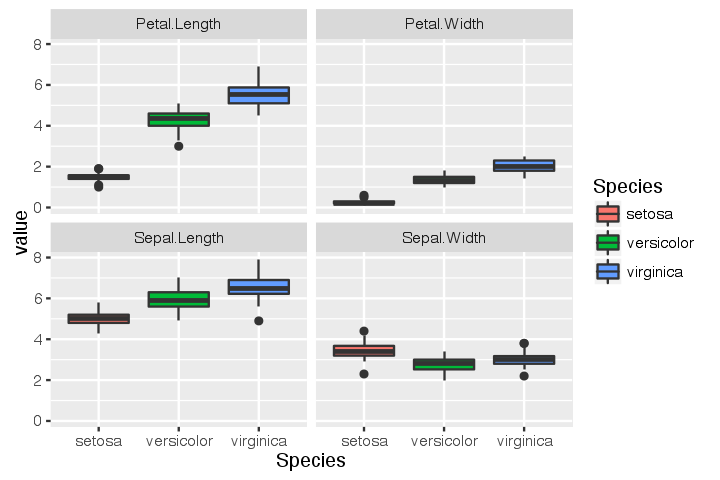

In [26]:
g + geom_boxplot() + facet_wrap(~ attribute)

#### Violin plots

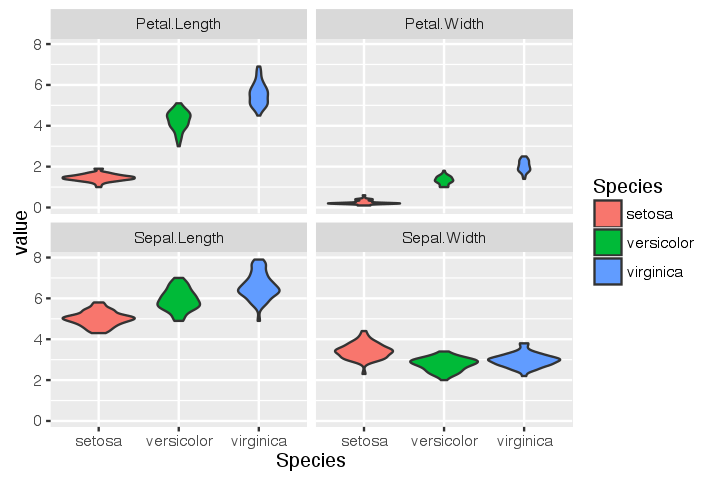

In [27]:
g + geom_violin() + facet_wrap(~ attribute)

#### Scatter plots (with jitter)

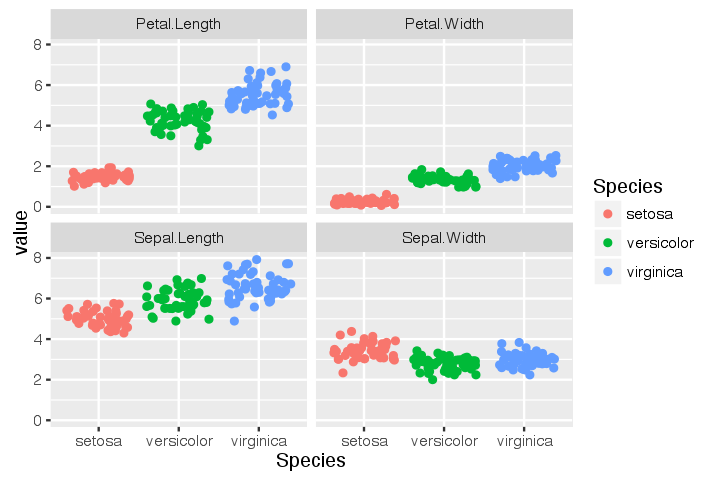

In [28]:
g + geom_jitter(aes(color=Species)) + facet_wrap(~ attribute)